# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings


In [ ]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet(r'C:\Users\Lenovo pc\AI & ML Notes\EDA - NYC Taxi Recods Assignment\trip_records\2023-1.parquet')
df.info()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
df['PickUp_Month'] = df['tpep_pickup_datetime'].dt.month
df['PickUp_Day'] = df['tpep_pickup_datetime'].dt.day
df['PickUp_hour'] = df['tpep_pickup_datetime'].dt.hour
df.head()
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
df = df[df['PickUp_Month']==1]

In [ ]:
sampled_data = pd.DataFrame()
for i in range(31):
    df_daily = df[df['PickUp_Day']==(i+1)]
    for j in range(24):
        df_hourly = df_daily[df_daily['PickUp_hour']==j]
        sample = df_hourly.sample(frac = 0.05, random_state = 42)
        sampled_data = pd.concat([sampled_data, sample])
sampled_data.info()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
# Select the folder having data files
# Create a list of all the twelve files to read
# initialise an empty dataframe
# iterate through the list of files and sample one by one:
# file path for the current file
# We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
# After completing iteration through each date, we will append this data to the final dataframe.
# Loop through dates and then loop through every hour of each date
# Iterate through each hour of the selected date
# Sample 5% of the hourly data randomly
# add data of this hour to the dataframe
# Concatenate the sampled data of all the dates to a single dataframe


import os
os.chdir(r'C:\Users\Lenovo pc\AI & ML Notes\EDA - NYC Taxi Recods Assignment\trip_records')

file_list = os.listdir()

df = pd.DataFrame()



yearly_sampled_data = []
for file_name in file_list:
    try:
        
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_monthly = pd.read_parquet(file_path)


        monthly_sampled_data = []

        df_monthly['PickUp_Month'] = df_monthly['tpep_pickup_datetime'].dt.month
        df_monthly['PickUp_Day'] = df_monthly['tpep_pickup_datetime'].dt.day
        df_monthly['PickUp_hour'] = df_monthly['tpep_pickup_datetime'].dt.hour
        for day in df_monthly['PickUp_Day'].unique():
            df_daily = df_monthly[df_monthly['PickUp_Day']==day]
            for hour in range(24):
                df_hourly = df_daily[df_daily['PickUp_hour']==hour]
                if not df_hourly.empty:
                    sample = df_hourly.sample(frac = 0.015, random_state = 42)
                    monthly_sampled_data.append(sample)
        yearly_sampled_data.append(pd.concat(monthly_sampled_data, ignore_index=True))# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df = pd.concat(yearly_sampled_data, ignore_index=True)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet(r'C:\Users\Lenovo pc\AI & ML Notes\EDA - NYC Taxi Recods Assignment\sample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [563]:
# Load the new data file
import pandas as pd
df = pd.read_parquet(r'C:\Users\Lenovo pc\AI & ML Notes\EDA - NYC Taxi Recods Assignment\sample.parquet')

In [564]:
df.shape

(568947, 23)

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568947 entries, 0 to 568946
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               568947 non-null  int64         
 1   tpep_pickup_datetime   568947 non-null  datetime64[us]
 2   tpep_dropoff_datetime  568947 non-null  datetime64[us]
 3   passenger_count        549650 non-null  float64       
 4   trip_distance          568947 non-null  float64       
 5   RatecodeID             549650 non-null  float64       
 6   store_and_fwd_flag     549650 non-null  object        
 7   PULocationID           568947 non-null  int64         
 8   DOLocationID           568947 non-null  int64         
 9   payment_type           568947 non-null  int64         
 10  fare_amount            568947 non-null  float64       
 11  extra                  568947 non-null  float64       
 12  mta_tax                568947 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [568]:
# Fix the index and drop any columns that are not needed
df.reset_index()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0            0         2  2023-01-01 00:31:50   2023-01-01 00:44:17   
1            1         2  2023-01-01 00:10:50   2023-01-01 00:24:12   
2            2         2  2023-01-01 00:25:37   2023-01-01 00:34:52   
3            3         2  2023-01-01 00:27:26   2023-01-01 00:52:20   
4            4         2  2023-01-01 00:59:15   2023-01-01 01:23:15   
...        ...       ...                  ...                   ...   
568942  568942         2  2023-09-30 23:19:38   2023-09-30 23:27:42   
568943  568943         2  2023-09-30 23:22:34   2023-09-30 23:34:48   
568944  568944         2  2023-09-30 23:19:59   2023-09-30 23:30:09   
568945  568945         2  2023-09-30 23:11:26   2023-09-30 23:28:16   
568946  568946         2  2023-09-30 23:47:44   2023-10-01 00:28:38   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0           2.85         1.0                  N   
1                   4.0           1.32         1.0                  N   
2                   1.0           3.17         1.0                  N   
3                   2.0           3.80         1.0                  N   
4                   NaN           7.97         NaN               None   
...                 ...            ...         ...                ...   
568942              1.0           1.05         1.0                  N   
568943              1.0           1.70         1.0                  N   
568944              1.0           2.03         1.0                  N   
568945              1.0           1.99         1.0                  N   
568946              1.0          17.64         2.0                  N   

        PULocationID  DOLocationID  ...  tip_amount  tolls_amount  \
0                263            41  ...        4.12          0.00   
1                 90           137  ...        3.56          0.00   
2                 79           141  ...        3.98          0.00   
3                142           107  ...        0.00          0.00   
4                140            17  ...        8.17          0.00   
...              ...           ...  ...         ...           ...   
568942           170            90  ...        2.86          0.00   
568943           107             4  ...        1.78          0.00   
568944            79           233  ...        1.00          0.00   
568945            79           158  ...        4.12          0.00   
568946           132           170  ...       16.54          6.94   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         24.72                   2.5   
1                         1.0         21.36                   2.5   
2                         1.0         23.88                   2.5   
3                         1.0         29.70                   2.5   
4                         1.0         49.00                   NaN   
...                       ...           ...                   ...   
568942                    1.0         17.16                   2.5   
568943                    1.0         19.58                   2.5   
568944                    1.0         18.10                   2.5   
568945                    1.0         24.72                   2.5   
568946                    1.0         99.23                   2.5   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  Airport_fee  
0               0.0             1           1            0          NaN  
1               0.0             1           1            0          NaN  
2               0.0             1           1            0          NaN  
3               0.0             1           1            0          NaN  
4               NaN             1           1            0          NaN  
...             ...           ...         ...          ...          ...  
568942          NaN             9          30           23         0.00  
568943          NaN          

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [570]:
# Combine the two airport fee columns
def mergeAirport_fee(x):
    if pd.isna(x['airport_fee']):
        return x['Airport_fee']
    return x['airport_fee']
df['airport_fee'] = df.apply(mergeAirport_fee,axis=1)
df = df.drop('Airport_fee', axis=1)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN               None           140            17   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.12           0.0   
1             1  ...      0.5        3.56           0.0   
2             1  ...      0.5        3.98           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

   PickUp_Month  PickUp_Day  PickUp_hour  
0             1           1            0  
1             1           1            0  
2             1           1            0  
3             1           1            0  
4             1           1            0  

[5 rows x 22 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [572]:
# check where values of fare amount are negative
df1 = df[df['total_amount']<0]

Did you notice something different in the `RatecodeID` column for above records?

In [574]:
# Analyse RatecodeID for the negative fare amounts

df1['RatecodeID'].value_counts()

RatecodeID
1.0    16
2.0     7
5.0     1
Name: count, dtype: int64

In [575]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=['number'])

negative_columns = numeric_df.columns[(numeric_df < 0).any()]
print("Columns with negative values:", list(negative_columns))

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [576]:
# fix these negative values
def convertPositive(x):
    if x<0:
        return -1*x
    return x
df['extra'] = df['extra'].apply(convertPositive)
df['mta_tax'] = df['mta_tax'].apply(convertPositive)
df['improvement_surcharge'] = df['improvement_surcharge'].apply(convertPositive)
df['congestion_surcharge'] = df['congestion_surcharge'].apply(convertPositive)
df['airport_fee'] = df['airport_fee'].apply(convertPositive)
df['total_amount'] = df.apply(lambda x: x['fare_amount']+x['extra']+x['mta_tax']+x['tip_amount']+x['tolls_amount']+x['improvement_surcharge']+x['congestion_surcharge']+x['airport_fee'] if x['total_amount'] < 0 else x['total_amount'],axis=1)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [579]:
# Find the proportion of missing values in each column
df.isna().mean()


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033917
trip_distance            0.000000
RatecodeID               0.033917
store_and_fwd_flag       0.033917
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033917
airport_fee              0.033917
PickUp_Month             0.000000
PickUp_Day               0.000000
PickUp_hour              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [581]:
# Display the rows with null values
# df[df['passenger_count'].isna()]
# Impute NaN values in 'passenger_count'
df['passenger_count'].value_counts()

passenger_count
1.0    413949
2.0     83011
3.0     20628
4.0     11381
0.0      8801
5.0      7123
6.0      4752
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [582]:
df['passenger_count'] = df['passenger_count'].fillna(1)

In [583]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: 1 if x==0 else x)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [586]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()

RatecodeID
1.0     518978
2.0      21437
99.0      3208
5.0       3094
3.0       1812
4.0       1121
Name: count, dtype: int64

In [587]:
df['RatecodeID'] = df['RatecodeID'].fillna(1)

In [588]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     538275
2.0      21437
99.0      3208
5.0       3094
3.0       1812
4.0       1121
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [590]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    507371
0.0     42279
Name: count, dtype: int64

In [591]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(2.5)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [593]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       19297
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              19297
PickUp_Month                 0
PickUp_Day                   0
PickUp_hour                  0
dtype: int64

In [594]:
# Handle any remaining missing values
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    546284
Y      3366
Name: count, dtype: int64

In [595]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

In [596]:
df['airport_fee'].value_counts()

airport_fee
0.00    501515
1.75     36181
1.25     11954
Name: count, dtype: int64

In [597]:
df['airport_fee'] = df['airport_fee'].fillna(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [600]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  568947.000000                      568947                      568947   
mean        1.733847  2023-07-02 19:01:27.911828  2023-07-02 19:18:49.184611   
min         1.000000         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%         1.000000         2023-04-02 16:03:26  2023-04-02 16:21:23.500000   
50%         2.000000         2023-06-27 15:29:27         2023-06-27 15:49:00   
75%         2.000000         2023-10-06 19:39:53  2023-10-06 19:57:51.500000   
max         6.000000         2024-01-01 00:01:34         2024-01-01 20:14:57   
std         0.447243                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    568947.000000  568947.000000  568947.000000  568947.000000   
mean          1.370326       3.637241       1.624283     165.256586   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   26217.980000      99.000000     265.000000   
std           0.862179      59.714666       7.342857      64.047531   

        DOLocationID   payment_type    fare_amount  ...        mta_tax  \
count  568947.000000  568947.000000  568947.000000  ...  568947.000000   
mean      164.002832       1.163852      20.068252  ...       0.495368   
min         1.000000       0.000000       0.000000  ...       0.000000   
25%       113.000000       1.000000       9.300000  ...       0.500000   
50%       162.000000       1.000000      13.500000  ...       0.500000   
75%       234.000000       1.000000      21.900000  ...       0.500000   
max       265.000000       4.000000  143163.450000  ...       4.000000   
std        69.815957       0.506936     190.640913  ...       0.048303   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  568947.000000  568947.000000          568947.000000  568947.000000   
mean        3.542869       0.592253               0.999082      29.119850   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.850000       0.000000               1.000000      21.000000   
75%         4.420000       0.000000               1.000000      30.800000   
max       150.290000     143.000000               1.000000  143167.450000   
std         4.033415       2.181056               0.027979     191.122219   

       congestion_surcharge    airport_fee   PickUp_Month     PickUp_Day  \
count         568947.000000  568947.000000  568947.000000  568947.000000   
mean               2.314223       0.137551       6.539999      15.518273   
min                0.000000       0.000000       1.000000       1.000000   
25%                2.500000       0.000000       4.000000       8.000000   
50%                2.500000       0.000000       6.000000      15.000000   
75%                2.500000       0.000000      10.000000      23.000000   
max                2.500000       1.750000      12.000000      31.000000   
std                0.655691       0.456796       3.466964       8.695819   

         PickUp_hour  
count  568947.000000  
mean       14.264898  
min         0.000000  
25%        11.000000  
50%        15.000000  
75%        19.000000  
max        23.000000  
std         5.807414  

[8 rows x 21 columns]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [604]:
# remove passenger_count > 6
df['passenger_count'].value_counts()

passenger_count
1.0    442047
2.0     83011
3.0     20628
4.0     11381
5.0      7123
6.0      4752
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [605]:
df = df[df['passenger_count']<=6]

In [606]:
# Continue with outlier handling
df[(df['trip_distance']<0.1) & (df['fare_amount']>300)]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
31822          2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
141920         2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
161133         2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
193755         2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
264043         1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
280490         2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
281803         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
295506         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
316347         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
351479         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
391560         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
467836         2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
503920         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
31822             0.0         5.0                  N           265   
141920            0.0         5.0                  N           265   
161133            0.0         5.0                  N           265   
193755            0.0         5.0                  N            14   
264043            0.0         5.0                  N           265   
280490            0.0         5.0                  N           132   
281803            0.0         5.0                  N           265   
295506            0.0         5.0                  N           265   
316347            0.0         5.0                  N           265   
351479            0.0         5.0                  N           246   
391560            0.0         5.0                  N           265   
467836            0.0         5.0                  N           265   
503920            0.0         5.0                  N           265   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
31822            265             1  ...      0.0       95.25           0.0   
141920           265             1  ...      0.0       61.23           0.0   
161133           265             2  ...      0.0        0.00           0.0   
193755            14             1  ...      0.0        0.00           0.0   
264043           265             1  ...      0.0        0.00           0.0   
280490           132             1  ...      0.0       70.20           0.0   
281803           265             2  ...      0.0        0.00           0.0   
295506           265             1  ...      0.0       70.20           0.0   
316347           265             3  ...      0.0        0.00           0.0   
351479           246             4  ...      0.0        0.00           0.0   
391560           265             2  ...      0.0        0.00           0.0   
467836           265             1  ...      0.0        0.00           0.0   
503920           265             1  ...      0.0       70.00          24.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
31822                     1.0        476.25                   0.0   
141920                    1.0        367.37                   0.0   
161133                    1.0        320.00                   0.0   
193755                    1.0        418.00                   0.0   
264043                    1.0        346.00                   0.0   
280490                    1.0        422.95                   0.0   
281803                    1.0        501.00                   0.0   
295506                    1.0        421.20                   0.0   
316347                    1.0        501.00                   0.0   
351479                    1.0        911.00                   0.0   
391560                    1.0        601.00           

In [607]:
df = df[~((df['trip_distance']<0.1) & (df['fare_amount']>300))]

In [608]:
df[(df['trip_distance']==0) & (df['fare_amount']==0) & (df['PULocationID']!=df['DOLocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
108671         1  2023-11-07 08:42:41   2023-11-07 08:42:41              1.0   
110199         1  2023-11-08 04:38:05   2023-11-08 04:41:18              1.0   
111029         1  2023-11-08 15:29:15   2023-11-08 15:29:47              1.0   
163573         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
181682         1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
185391         1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
193100         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   
200730         1  2023-03-28 23:33:55   2023-03-28 23:33:55              1.0   
270366         1  2023-06-14 09:40:39   2023-06-14 09:40:39              1.0   
294094         1  2023-06-28 21:29:09   2023-06-28 21:32:08              1.0   
339285         1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
427098         2  2023-04-28 13:52:30   2023-04-28 14:43:03              1.0   
438556         1  2023-05-02 17:42:04   2023-05-02 17:42:04              1.0   
466636         2  2023-05-19 10:55:37   2023-05-19 10:55:44              1.0   
514331         1  2023-07-21 18:45:23   2023-07-21 18:46:05              1.0   
553374         1  2023-09-17 20:40:48   2023-09-17 20:40:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
108671            0.0         1.0                  N           237   
110199            0.0         1.0                  N           233   
111029            0.0         1.0                  N           164   
163573            0.0         2.0                  N           107   
181682            0.0         5.0                  Y           138   
185391            0.0         5.0                  Y           138   
193100            0.0         5.0                  N           132   
200730            0.0         5.0                  Y           265   
270366            0.0         5.0                  Y           265   
294094            0.0         1.0                  N           246   
339285            0.0        99.0                  Y           145   
427098            0.0         1.0                  N           264   
438556            0.0         5.0                  N            75   
466636            0.0         1.0                  N             7   
514331            0.0         1.0                  N            56   
553374            0.0         5.0                  N            79   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
108671           264             2  ...      0.0         0.0           0.0   
110199           107             3  ...      0.0         0.0           0.0   
111029           161             1  ...      0.0         0.0           0.0   
163573           137             2  ...      0.5         0.0           0.0   
181682           264             3  ...      0.0         0.0           0.0   
185391           264             2  ...      0.0         0.0           0.0   
193100           215             4  ...      0.0         0.0           0.0   
200730           264             2  ...      0.0         0.0           0.0   
270366           264             2  ...      0.0         0.0           0.0   
294094            90             1  ...      0.0         0.0           0.0   
339285           264             2  ...      0.0         0.0           0.0   
427098           255             2  ...      0.5         0.0           0.0   
438556           264             2  ...      0.0         0.0           0.0   
466636           193             1  ...      0.5         0.0           0.0   
514331            82             1  ...      0.0         0.0           0.0   
553374           264             2  ...      0.0         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
108671                    0.0          0.00                 

In [609]:
df = df[~((df['trip_distance']==0) & (df['fare_amount']==0) & (df['PULocationID']!=df['DOLocationID']))]

In [610]:
df[df['trip_distance']>250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
203291         2  2023-03-02 15:45:34   2023-03-02 16:00:45              1.0   
251958         2  2023-06-03 06:23:00   2023-06-03 06:31:00              1.0   
268554         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   
297220         2  2023-06-30 23:40:00   2023-07-01 00:11:00              1.0   
364365         2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
370347         2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
455964         2  2023-05-12 15:12:50   2023-05-12 16:03:58              1.0   
473430         2  2023-05-25 11:10:00   2023-05-25 11:35:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
203291        9674.01         1.0                  N           161   
251958       26217.98         1.0                  N           231   
268554       22528.82         1.0                  N           116   
297220       20314.00         1.0                  N           237   
364365        8645.77         1.0                  N           238   
370347        6284.45         1.0                  N           186   
455964        9678.78         1.0                  N           138   
473430       10433.95         1.0                  N           116   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
203291            68             1  ...      0.5        2.00          0.00   
251958            68             0  ...      0.5        2.93          0.00   
268554           239             0  ...      0.5        0.37          0.00   
297220           248             0  ...      0.5        7.09          0.00   
364365           230             0  ...      0.5        4.34          0.00   
370347           236             0  ...      0.5        0.00          0.00   
455964           116             2  ...      0.5        0.00          6.55   
473430           238             0  ...      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
203291                    1.0         20.20                   2.5   
251958                    1.0         17.56                   2.5   
268554                    1.0         21.79                   2.5   
297220                    1.0         42.56                   2.5   
364365                    1.0         21.68                   2.5   
370347                    1.0         20.00                   2.5   
455964                    1.0         55.15                   0.0   
473430                    1.0         25.25                   2.5   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  
203291          0.0             3           2           15  
251958          0.0             6           3            6  
268554          0.0             6          13            9  
297220          0.0             6          30           23  
364365          0.0             2          17            7  
370347          0.0             2          19           22  
455964          0.0             5          12           15  
473430          0.0             5          25           11  

[8 rows x 22 columns]

In [611]:
df = df[df['trip_distance']<=250]

In [612]:
df = df[df['payment_type']!=0]

In [613]:
# Do any columns need standardising?
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 549614 entries, 0 to 568946
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               549614 non-null  int64         
 1   tpep_pickup_datetime   549614 non-null  datetime64[us]
 2   tpep_dropoff_datetime  549614 non-null  datetime64[us]
 3   passenger_count        549614 non-null  float64       
 4   trip_distance          549614 non-null  float64       
 5   RatecodeID             549614 non-null  float64       
 6   store_and_fwd_flag     549614 non-null  object        
 7   PULocationID           549614 non-null  int64         
 8   DOLocationID           549614 non-null  int64         
 9   payment_type           549614 non-null  int64         
 10  fare_amount            549614 non-null  float64       
 11  extra                  549614 non-null  float64       
 12  mta_tax                549614 non-null  float64  

In [614]:
df[df['tpep_pickup_datetime'].dt.year!=2023]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
97941          2  2009-01-01 00:05:00   2009-01-01 00:13:17              1.0   
147477         2  2024-01-01 00:01:34   2024-01-01 00:05:41              1.0   
197492         2  2001-01-01 00:06:49   2001-01-01 15:42:11              2.0   
384195         2  2002-12-31 23:18:49   2002-12-31 23:33:34              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
97941            1.58         1.0                  N           236   
147477           0.71         1.0                  N           234   
197492           7.41         1.0                  N           161   
384195           3.03         1.0                  N           141   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
97941            238             2  ...      0.5         0.0           0.0   
147477            68             2  ...      0.5         0.0           0.0   
197492           231             1  ...      0.5         7.0           0.0   
384195            79             2  ...      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
97941                     1.0          14.0                   2.5   
147477                    1.0          11.5                   2.5   
197492                    1.0          46.9                   2.5   
384195                    1.0          21.0                   2.5   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  
97941           0.0             1           1            0  
147477          0.0             1           1            0  
197492          0.0             1           1            0  
384195          0.0            12          31           23  

[4 rows x 22 columns]

In [615]:
df = df[df['tpep_pickup_datetime'].dt.year==2023]

In [616]:
df[(df['tpep_dropoff_datetime'].dt.year!=2023) & (df['tpep_dropoff_datetime'].dt.year!=2024)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, PickUp_Month, PickUp_Day, PickUp_hour]
Index: []

[0 rows x 22 columns]

In [617]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     518965
2.0      21436
99.0      3207
5.0       3069
3.0       1812
4.0       1121
Name: count, dtype: int64

In [618]:
df['RatecodeID'] = df['RatecodeID'].apply(lambda x: 6 if x== 99 else x)

<Axes: ylabel='fare_amount'>

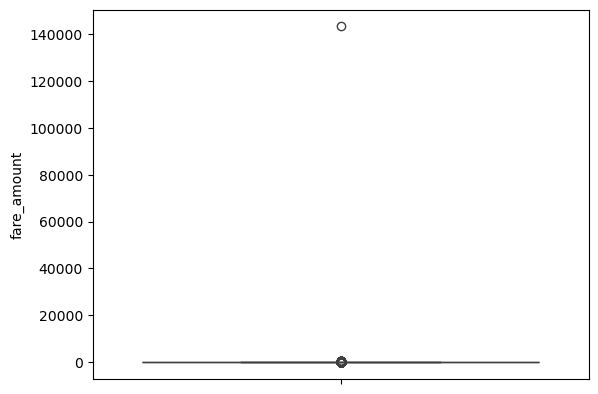

In [619]:
import seaborn as sns

sns.boxplot(df['fare_amount'])

<Axes: ylabel='fare_amount'>

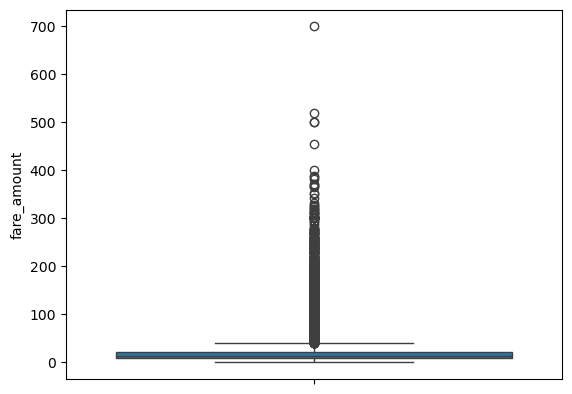

In [620]:
sns.boxplot(df[df['fare_amount']<10000]['fare_amount'])

In [621]:
df = df[df['fare_amount']<=700]

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

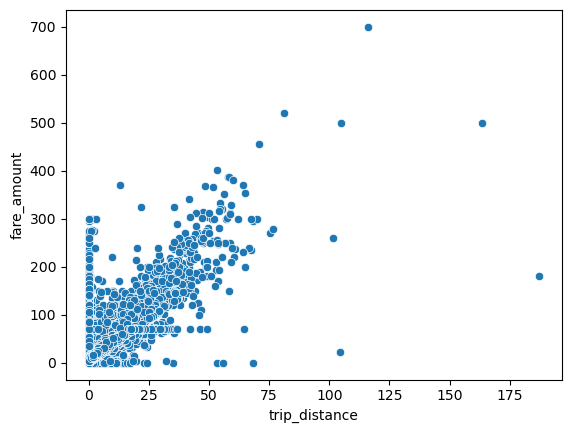

In [622]:
sns.scatterplot(data=df,x='trip_distance',y='fare_amount')

In [623]:
df[(df['trip_distance']==0) & (df['PULocationID']==df['DOLocationID']) & (df['fare_amount']!=0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
27             1  2023-01-01 00:45:06   2023-01-01 00:54:06              1.0   
95             2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   
114            1  2023-01-01 01:25:41   2023-01-01 01:25:45              1.0   
120            1  2023-01-01 01:26:38   2023-01-01 01:27:12              1.0   
121            2  2023-01-01 01:20:00   2023-01-01 01:20:02              4.0   
...          ...                  ...                   ...              ...   
568326         2  2023-09-30 17:42:38   2023-09-30 17:42:42              1.0   
568485         1  2023-09-30 19:44:14   2023-09-30 19:44:36              1.0   
568774         1  2023-09-30 22:25:15   2023-09-30 22:25:19              1.0   
568854         2  2023-09-30 23:34:29   2023-09-30 23:49:06              1.0   
568937         2  2023-09-30 23:06:18   2023-09-30 23:06:29              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
27                0.0         1.0                  N            48   
95                0.0         5.0                  N           265   
114               0.0         1.0                  N           148   
120               0.0         5.0                  N           229   
121               0.0         5.0                  N           264   
...               ...         ...                ...           ...   
568326            0.0         5.0                  N           211   
568485            0.0         1.0                  N           168   
568774            0.0         1.0                  N           152   
568854            0.0         1.0                  N           264   
568937            0.0         1.0                  N           132   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
27                48             2  ...      0.5        0.00           0.0   
95               265             1  ...      0.0       10.20           0.0   
114              148             1  ...      0.5       52.00           0.0   
120              229             1  ...      0.0        0.00           0.0   
121              264             1  ...      0.0        0.80           0.0   
...              ...           ...  ...      ...         ...           ...   
568326           211             1  ...      0.0       17.70           0.0   
568485           168             2  ...      0.5        0.00           0.0   
568774           152             1  ...      0.5        0.00           0.0   
568854           264             1  ...      0.5        4.59           0.0   
568937           132             4  ...      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
27                        1.0         13.60                   2.5   
95                        1.0         61.20                   0.0   
114                       1.0         60.00                   2.5   
120                       1.0          6.00                   0.0   
121                       1.0         46.80                   0.0   
...                       ...           ...                   ...   
568326                    1.0        106.20                   2.5   
568485                    1.0          4.50                   0.0   
568774                    1.0         36.00                   0.0   
568854                    1.0         19.89                   0.0   
568937                    1.0          7.25                   0.0   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  
27             0.00             1           1            0  
95             0.00             1           1            1  
114            0.00             1           1            1  
120            0.00             1           1            1  
121            0.00             1           1            1  
...             ...           ...         ...          ...  
568326       

In [624]:
#above records seems to be fake as trip_distance is zero but amount is charged
df = df[~((df['trip_distance']==0) & (df['PULocationID']==df['DOLocationID']) & (df['fare_amount']!=0))]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [626]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'PickUp_Month',
 'PickUp_Day',
 'PickUp_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='PickUp_hour', ylabel='count'>

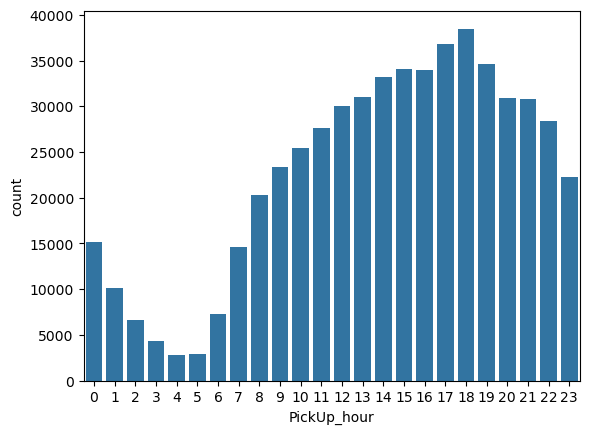

In [631]:
# Find and show the hourly trends in taxi pickups

sns.countplot(x=df['PickUp_hour'])

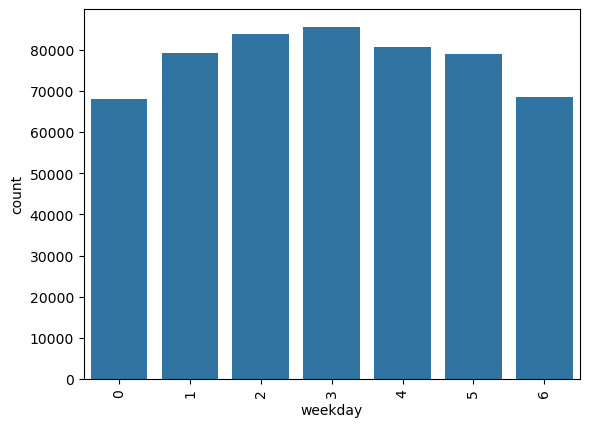

In [632]:
# Find and show the daily trends in taxi pickups (days of the week)
import matplotlib.pyplot as plt

df['weekday'] = df['tpep_pickup_datetime'].dt.weekday
sns.countplot(x=df['weekday'])
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='PickUp_Month', ylabel='count'>

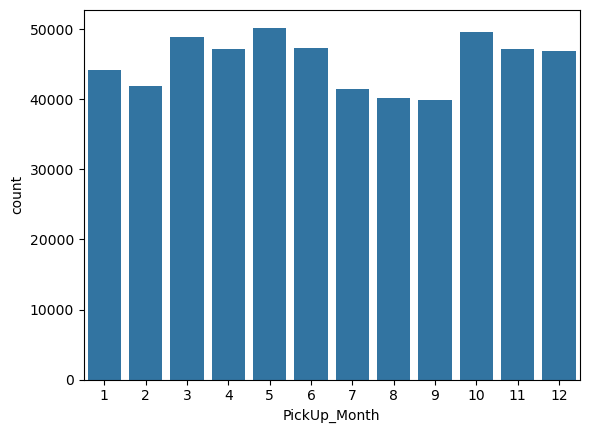

In [633]:
# Show the monthly trends in pickups

sns.countplot(x=df['PickUp_Month'])

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [636]:
# Analyse the above parameters
df[df['fare_amount']==0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
936            1  2023-01-01 19:16:54   2023-01-01 19:17:15              1.0   
3224           1  2023-01-24 13:30:17   2023-01-24 13:30:44              2.0   
4054           2  2023-01-24 21:42:10   2023-01-24 21:59:30              4.0   
4104           1  2023-01-24 22:00:34   2023-01-24 22:29:12              1.0   
14663          1  2023-01-08 13:06:14   2023-01-08 13:06:49              1.0   
...          ...                  ...                   ...              ...   
559021         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
561029         1  2023-09-26 13:16:50   2023-09-26 13:48:54              1.0   
561591         1  2023-09-26 18:57:05   2023-09-26 19:07:08              1.0   
567859         1  2023-09-30 13:22:42   2023-09-30 13:33:41              1.0   
568215         2  2023-09-30 16:35:07   2023-09-30 16:35:13              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
936              0.00         2.0                  N           261   
3224             0.00         1.0                  N           145   
4054             3.57         1.0                  N           144   
4104            17.10         5.0                  N           142   
14663            0.00         1.0                  N           145   
...               ...         ...                ...           ...   
559021          24.18         4.0                  N           138   
561029           0.40         6.0                  N            61   
561591           2.70         6.0                  N           205   
567859           2.00         5.0                  N           142   
568215           0.00         5.0                  N           141   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
936              261             3  ...         0.0          0.00   
3224             145             2  ...         0.0          0.00   
4054              68             2  ...         0.0          0.00   
4104             265             3  ...         0.0         12.75   
14663            145             4  ...         0.0          0.00   
...              ...           ...  ...         ...           ...   
559021           265             2  ...         0.0          0.00   
561029            61             1  ...         0.0          0.00   
561591           218             1  ...         0.0          0.00   
567859            48             3  ...         0.0          0.00   
568215           141             2  ...         0.0          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
936                       0.0          0.00                   0.0   
3224                      0.0          0.00                   0.0   
4054                      1.0          4.00                   2.5   
4104                      1.0         13.75                   0.0   
14663                     0.0          0.00                   0.0   
...                       ...           ...                   ...   
559021                    1.0          3.25                   0.0   
561029                    0.0          0.00                   0.0   
561591                    0.0          0.00                   0.0   
567859                    1.0          1.00                   0.0   
568215                    1.0          3.50                   2.5   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  weekday  
936            0.00             1           1           19        6  
3224           0.00             1          24           13        1  
4054           0.00             1          24           21        1  
4104           0.00             1          24           22        1  
14663          0.00             1           8           13        6  
...             ...           ...         ...          ...      ...  
559021         1.75             9          25            0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [639]:
# Create a df with non zero entries for the selected parameters.
df1 = df[df['fare_amount']!=0]


In [640]:
df1[df1['tip_amount']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3              2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
7              2  2023-01-01 00:35:52   2023-01-01 00:43:38              2.0   
9              2  2023-01-01 00:17:43   2023-01-01 01:03:15              1.0   
10             1  2023-01-01 00:53:06   2023-01-01 01:01:57              1.0   
13             1  2023-01-01 00:08:49   2023-01-01 00:26:15              1.0   
...          ...                  ...                   ...              ...   
568898         1  2023-09-30 23:58:35   2023-10-01 00:41:08              1.0   
568908         2  2023-09-30 23:39:11   2023-10-01 00:05:50              2.0   
568910         2  2023-09-30 23:54:53   2023-10-01 00:08:11              4.0   
568915         2  2023-09-30 23:04:31   2023-09-30 23:09:03              3.0   
568921         2  2023-09-30 23:24:27   2023-09-30 23:32:04              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3                3.80         1.0                  N           142   
7                1.41         1.0                  N           161   
9               27.99         1.0                  N           132   
10               1.00         1.0                  N           261   
13               1.50         1.0                  N           170   
...               ...         ...                ...           ...   
568898          13.70         1.0                  N           163   
568908           3.36         1.0                  N            79   
568910           2.34         1.0                  N           148   
568915           0.60         1.0                  N           229   
568921           1.15         1.0                  N           230   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
3                107             2  ...         0.0          0.00   
7                141             2  ...         0.0          0.00   
9                158             2  ...         0.0          6.55   
10               231             4  ...         0.0          0.00   
13                43             2  ...         0.0          0.00   
...              ...           ...  ...         ...           ...   
568898           265             4  ...         0.0         18.25   
568908           163             2  ...         0.0          0.00   
568910           170             2  ...         0.0          0.00   
568915           161             2  ...         0.0          0.00   
568921           229             2  ...         0.0          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
3                         1.0         29.70                   2.5   
7                         1.0         15.00                   2.5   
9                         1.0        118.70                   2.5   
10                        1.0         13.60                   2.5   
13                        1.0         21.30                   2.5   
...                       ...           ...                   ...   
568898                    1.0         82.95                   2.5   
568908                    1.0         29.70                   2.5   
568910                    1.0         20.60                   2.5   
568915                    1.0         11.50                   2.5   
568921                    1.0         14.30                   2.5   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  weekday  
3              0.00             1           1            0        6  
7              0.00             1           1            0        6  
9              1.25             1           1            0        6  
10             0.00             1           1            0        6  
13             0.00             1           1            0        6  
...             ...           ...         ...          ...      ...  
568898         0.00             9          30           23

In [641]:
df1 = df1[df1['tip_amount']!=0]

In [642]:
df1[df1['trip_distance']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
236            2  2023-01-01 02:21:25   2023-01-01 02:21:27              1.0   
630            2  2023-01-01 14:10:27   2023-01-01 14:30:57              1.0   
1127           2  2023-01-01 23:14:50   2023-01-01 23:24:42              1.0   
1344           2  2023-01-31 08:59:33   2023-01-31 09:07:03              1.0   
1398           2  2023-01-31 09:06:58   2023-01-31 09:24:12              1.0   
...          ...                  ...                   ...              ...   
566183         2  2023-09-29 11:42:08   2023-09-29 12:02:23              5.0   
566466         2  2023-09-29 15:57:25   2023-09-29 17:09:04              1.0   
566734         2  2023-09-29 17:53:19   2023-09-29 18:56:59              1.0   
567205         2  2023-09-29 23:02:26   2023-09-29 23:35:56              1.0   
567429         2  2023-09-30 03:50:33   2023-09-30 03:50:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
236               0.0         5.0                  N            68   
630               0.0         1.0                  N           264   
1127              0.0         1.0                  N            79   
1344              0.0         1.0                  N           237   
1398              0.0         1.0                  N           231   
...               ...         ...                ...           ...   
566183            0.0         1.0                  N           113   
566466            0.0         1.0                  N           138   
566734            0.0         2.0                  N           132   
567205            0.0         3.0                  N           230   
567429            0.0         5.0                  N            90   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
236              264             1  ...        4.30          0.00   
630              161             1  ...        4.20          0.00   
1127             186             1  ...        2.86          0.00   
1344              43             1  ...        3.57          0.00   
1398              90             1  ...        3.78          0.00   
...              ...           ...  ...         ...           ...   
566183           114             1  ...        3.00          0.00   
566466           151             1  ...       13.73          6.94   
566734            68             1  ...       17.54          6.94   
567205           265             1  ...       15.21         12.75   
567429           186             1  ...        7.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
236                       1.0         25.80                   0.0   
630                       1.0         25.20                   2.5   
1127                      1.0         17.16                   2.5   
1344                      1.0         15.47                   2.5   
1398                      1.0         22.68                   2.5   
...                       ...           ...                   ...   
566183                    1.0         24.00                   2.5   
566466                    1.0         84.12                   2.5   
566734                    1.0        105.23                   2.5   
567205                    1.0         76.06                   0.0   
567429                    1.0         19.60                   2.5   

        airport_fee  PickUp_Month  PickUp_Day  PickUp_hour  weekday  
236            0.00             1           1            2        6  
630            0.00             1           1           14        6  
1127           0.00             1           1           23        6  
1344           0.00             1          31            8        1  
1398           0.00             1          31            9        1  
...             ...           ...         ...          ...      ...  
566183         0.00             9          29           11

In [643]:
df1 = df1[df1['trip_distance']!=0]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='PickUp_Month', ylabel='total_amount'>

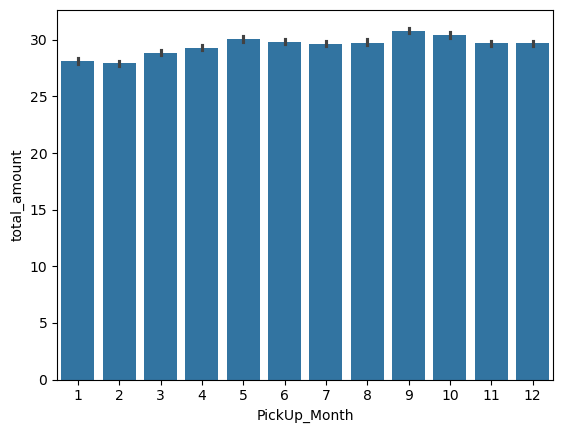

In [645]:
# Group data by month and analyse monthly revenue
sns.barplot(data=df1,x='PickUp_Month',y='total_amount')


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [647]:
# Calculate proportion of each quarter
def quarter(x):
    if x>=1 and x<=3:
        return 1
    elif x>=4 and x<=6:
        return 2
    elif x>=7 and x<=9:
        return 3
    return 4
df['quarter'] = df['PickUp_Month'].apply(quarter)

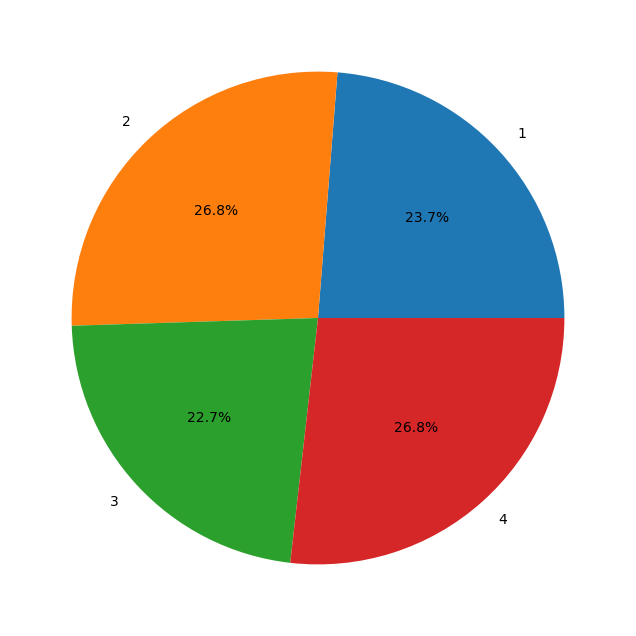

In [648]:
quarterly_totals = df.groupby('quarter')['total_amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(quarterly_totals, labels=quarterly_totals.index, autopct='%1.1f%%')

plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

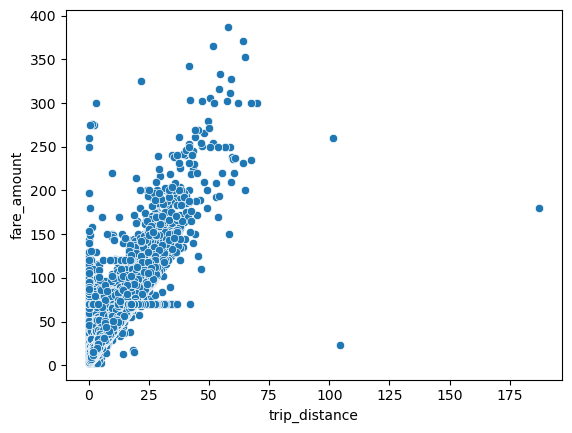

In [650]:
# Show how trip fare is affected by distance

sns.scatterplot(data=df1, x='trip_distance', y='fare_amount')

In [651]:
correlation1 = df1['trip_distance'].corr(df1['fare_amount'])

In [652]:
correlation1

0.9486589094849368

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [654]:
# Show relationship between fare and trip duration

df1['trip_duration'] = df1['tpep_dropoff_datetime']-df1['tpep_pickup_datetime']

In [655]:
df1['trip_duration'] = df1['trip_duration'].dt.total_seconds()/60

<Axes: xlabel='trip_duration', ylabel='fare_amount'>

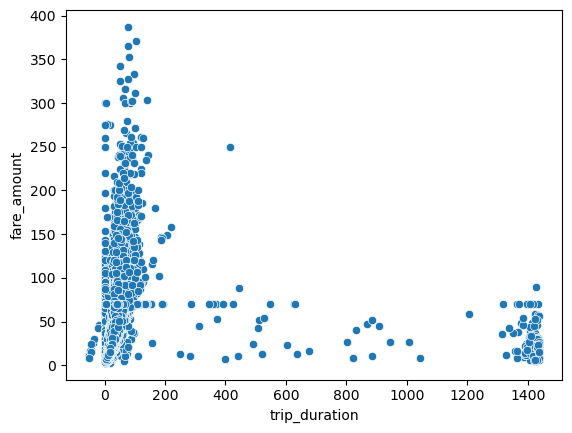

In [656]:
sns.scatterplot(data=df1,x='trip_duration',y='fare_amount')

In [657]:
correlation2 = df1['trip_duration'].corr(df1['fare_amount'])

In [658]:
correlation2

0.3343907614771709

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

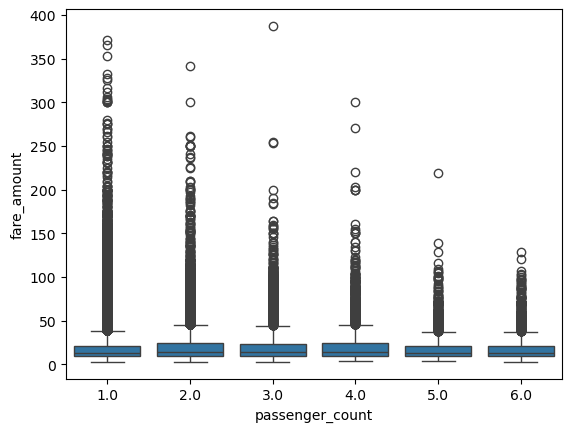

In [659]:
# Show relationship between fare and number of passengers
sns.boxplot(data=df1,x='passenger_count',y='fare_amount')


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

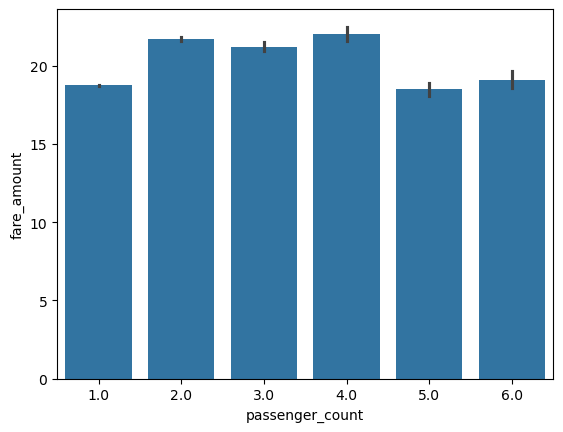

In [660]:
sns.barplot(data=df1,x='passenger_count',y='fare_amount')

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

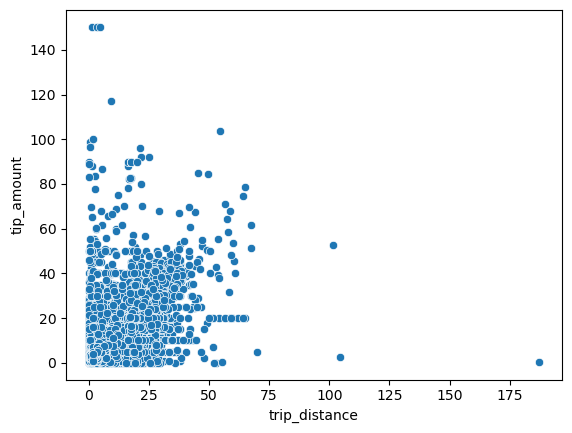

In [661]:
# Show relationship between tip and trip distance

sns.scatterplot(data=df1,x='trip_distance',y='tip_amount')

In [662]:
correlation3 = df1['trip_distance'].corr(df1['tip_amount'])

In [663]:
correlation3

0.799601579930584

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [665]:
# Analyse the distribution of different payment types (payment_type).

# sns.histplot(df1['payment_type'])
df1['payment_type'].value_counts()

payment_type
1    424127
4         6
2         6
3         3
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [670]:
!pip install geopandas
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [672]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\Lenovo pc\AI & ML Notes\EDA - NYC Taxi Recods Assignment\taxi_zones\taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

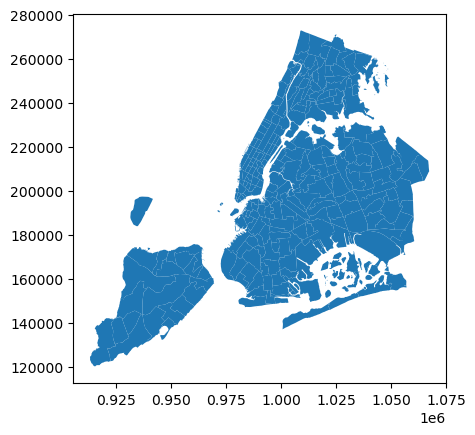

In [674]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [677]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df1, zones, left_on='PULocationID', right_on='LocationID', how='left')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [679]:
# Group data by location and calculate the number of trips
grouped_df = merged_df.groupby(['PULocationID', 'zone']).size().reset_index(name='trips_count')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [681]:
# Merge trip counts back to the zones GeoDataFrame
zones = pd.merge(zones,grouped_df,left_on=['LocationID', 'zone'], right_on=['PULocationID', 'zone'],how='left')

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trips_count  
0           1.0         12.0  
1           NaN          NaN  
2           NaN          NaN  
3           4.0        412.0  
4           NaN          NaN

In [682]:
zones.drop('PULocationID',axis=1)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     trips_count  
0           12.0  
1            NaN  
2            NaN  
3          412.0  
4            NaN  
..           ...  
258          NaN  
259         28.0  
260       2081.0  
261       5681.0  
262       8392.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

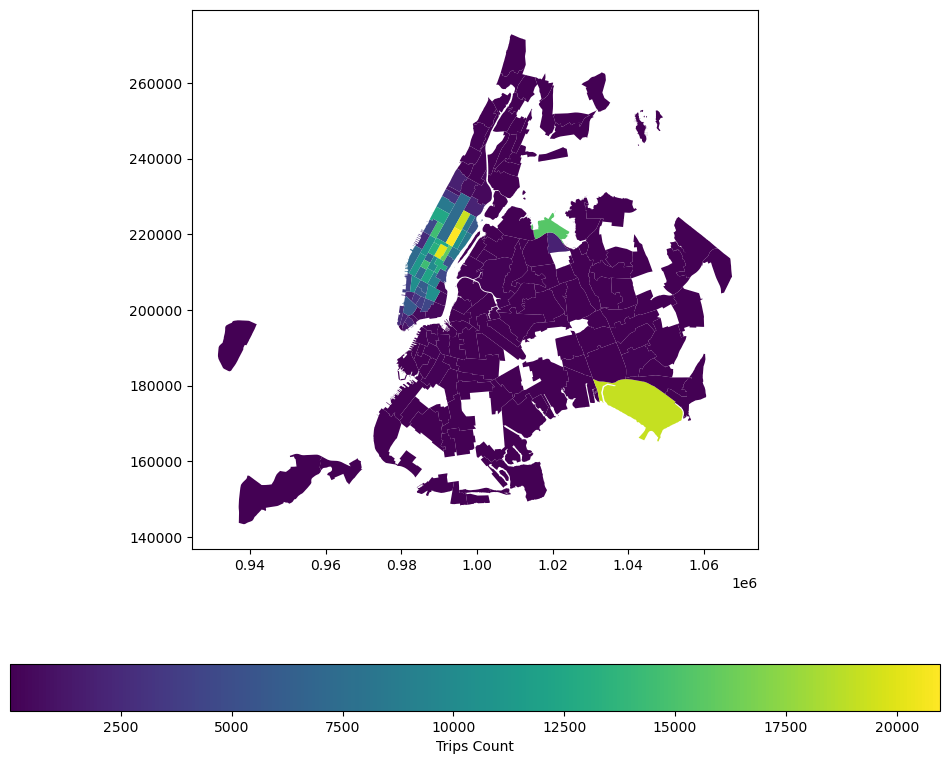

In [686]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='trips_count',ax=ax,legend=True,legend_kwds = {'label': "Trips Count", 'orientation': "horizontal"})
plt.show()


In [687]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('trips_count',ascending=False)


OBJECTID  Shape_Leng  Shape_Area                           zone  \
236       237    0.042213    0.000096          Upper East Side South   
160       161    0.035804    0.000072                 Midtown Center   
235       236    0.044252    0.000103          Upper East Side North   
131       132    0.245479    0.002038                    JFK Airport   
161       162    0.035270    0.000048                   Midtown East   
..        ...         ...         ...                            ...   
249       250    0.079626    0.000241  Westchester Village/Unionport   
250       251    0.137711    0.000626                    Westerleigh   
253       254    0.085886    0.000360       Williamsbridge/Olinville   
256       257    0.058669    0.000139                Windsor Terrace   
258       259    0.126750    0.000395             Woodlawn/Wakefield   

     LocationID        borough  \
236         237      Manhattan   
160         161      Manhattan   
235         236      Manhattan   
131         132         Queens   
161         162      Manhattan   
..          ...            ...   
249         250          Bronx   
250         251  Staten Island   
253         254          Bronx   
256         257       Brooklyn   
258         259          Bronx   

                                              geometry  PULocationID  \
236  POLYGON ((993633.442 216961.016, 993507.232 21...         237.0   
160  POLYGON ((991081.026 214453.698, 990952.644 21...         161.0   
235  POLYGON ((995940.048 221122.92, 995812.322 220...         236.0   
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...         132.0   
161  POLYGON ((992224.354 214415.293, 992096.999 21...         162.0   
..                                                 ...           ...   
249  POLYGON ((1026991.885 245048.502, 1027255.054 ...           NaN   
250  POLYGON ((947868.004 169247.734, 948000.981 16...           NaN   
253  POLYGON ((1025214.477 259577.301, 1025348.099 ...           NaN   
256  POLYGON ((989842.548 179997.856, 989842.643 17...           NaN   
258  POLYGON ((1025414.782 270986.139, 1025138.624 ...           NaN   

     trips_count  
236      20974.0  
160      20210.0  
235      19277.0  
131      19106.0  
161      15862.0  
..           ...  
249          NaN  
250          NaN  
253          NaN  
256          NaN  
258          NaN  

[263 rows x 9 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [696]:
# Find routes which have the slowest speeds at different times of the day
grouped_df1 = df1.groupby(['PULocationID','DOLocationID'])[['trip_distance','trip_duration']].mean()
grouped_df1['avg_speed'] = grouped_df1['trip_distance']/grouped_df1['trip_duration']
grouped_df1.sort_values('avg_speed')

trip_distance  trip_duration  avg_speed
PULocationID DOLocationID                                         
48           184                0.140000      65.666667   0.002132
260          260                0.900000     144.716667   0.006219
148          265                4.580000     720.191667   0.006359
237          57                11.090000    1432.016667   0.007744
209          25                 2.392000     296.683333   0.008062
...                                  ...            ...        ...
216          216                0.412222       0.292593   1.408861
1            1                  2.234444       1.133333   1.971569
89           89                 0.440000       0.083333   5.280000
129          264                0.610000       0.066667   9.150000
93           264                0.720000       0.050000  14.400000

[8557 rows x 3 columns]

In [697]:
zones[(zones['LocationID']==48) | (zones['LocationID']==184)]

OBJECTID  Shape_Leng  Shape_Area             zone  LocationID    borough  \
47         48    0.043747    0.000094     Clinton East          48  Manhattan   
183       184    0.260816    0.001989  Pelham Bay Park         184      Bronx   

                                              geometry  PULocationID  \
47   POLYGON ((986694.313 214463.846, 986568.184 21...          48.0   
183  MULTIPOLYGON (((1037536.693 262105.37, 1037634...           NaN   

     trips_count  
47       10895.0  
183          NaN

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<Axes: xlabel='PickUp_hour', ylabel='trips_count'>

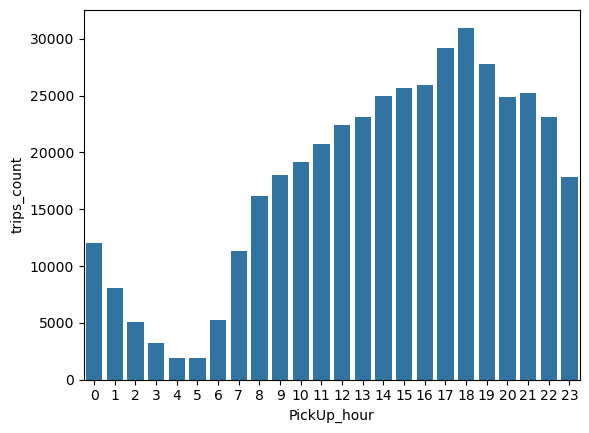

In [700]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips_count = df1.groupby('PickUp_hour').size().reset_index(name='trips_count').sort_values('trips_count',ascending=False)
sns.barplot(data=hourly_trips_count,x='PickUp_hour',y='trips_count')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [898]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.015
hourly_trips_count['trips_count'] /=sample_fraction 
hourly_trips_count


PickUp_hour   trips_count
18           18  1.377867e+08
17           17  1.296400e+08
19           19  1.236222e+08
16           16  1.154667e+08
15           15  1.140667e+08
21           21  1.120089e+08
14           14  1.108667e+08
20           20  1.107200e+08
13           13  1.029244e+08
22           22  1.027200e+08
12           12  9.970667e+07
11           11  9.208889e+07
10           10  8.518667e+07
9             9  8.016000e+07
23           23  7.928444e+07
8             8  7.183111e+07
0             0  5.338667e+07
7             7  5.049778e+07
1             1  3.570222e+07
6             6  2.345333e+07
2             2  2.266667e+07
3             3  1.440444e+07
5             5  8.582222e+06
4             4  8.302222e+06

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [705]:
# Compare traffic trends for the week days and weekends
df1['is_weekend'] = df1['tpep_pickup_datetime'].dt.weekday>=5

In [706]:
grouped_df2 = df1.groupby(['weekday','PickUp_hour'])[['trip_distance','trip_duration']].mean()

In [707]:
grouped_df2['avg_speed'] = grouped_df2['trip_distance']/grouped_df2['trip_duration']

In [708]:
grouped_df2

trip_distance  trip_duration  avg_speed
weekday PickUp_hour                                         
0       0                 6.628753      17.482274   0.379170
        1                 5.542269      13.983250   0.396351
        2                 4.660788      12.869130   0.362168
        3                 5.392313      13.048186   0.413262
        4                 7.060301      15.449123   0.457003
...                            ...            ...        ...
6       19                4.005899      17.482176   0.229142
        20                4.256227      17.307566   0.245917
        21                4.582824      16.215569   0.282619
        22                5.250532      16.342904   0.321273
        23                6.260477      17.068656   0.366782

[168 rows x 3 columns]

<Axes: xlabel='PickUp_hour', ylabel='weekday'>

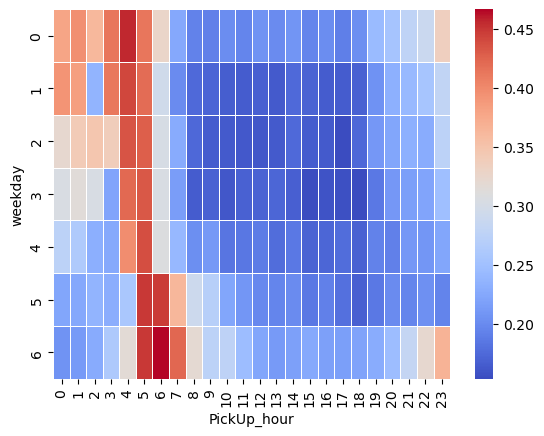

In [709]:
heatmap_data = grouped_df2.pivot_table(index='weekday',columns='PickUp_hour',values='avg_speed')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [712]:
# Find top 10 pickup and dropoff zones
zones = gpd.read_file(r"C:\Users\Lenovo pc\AI & ML Notes\EDA - NYC Taxi Recods Assignment\taxi_zones\taxi_zones.shp")
grouped_df3 = df1.groupby(['PULocationID','PickUp_hour']).size().reset_index(name='pickup_count')
merged_zones1 = pd.merge(zones,grouped_df3,left_on='LocationID',right_on='PULocationID',how='left')

In [713]:
merged_zones1.drop('PULocationID',axis=1,inplace=True)

In [714]:
df1['DropOff_hour'] = df1['tpep_dropoff_datetime'].dt.hour

In [715]:
grouped_df4 = merged_zones1.groupby('LocationID')['pickup_count'].sum().reset_index(name='location_pickup_count').sort_values('location_pickup_count',ascending=False).iloc[:10]

In [716]:
merged_zones2 = pd.merge(grouped_df4,merged_zones1,left_on='LocationID',right_on='LocationID')

<Axes: xlabel='PickUp_hour', ylabel='zone'>

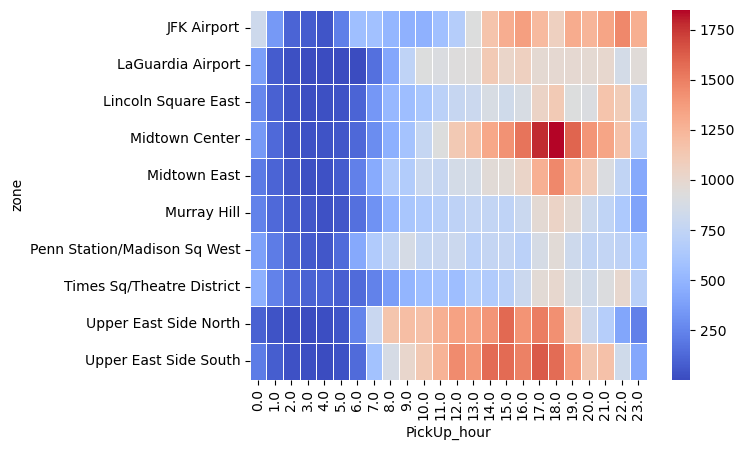

In [717]:
heatmap_data = merged_zones2.pivot_table(index='zone',columns='PickUp_hour',values='pickup_count')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

In [718]:
grouped_df4 = df1.groupby(['DOLocationID','DropOff_hour']).size().reset_index(name='dropoff_count')
merged_zones3 = pd.merge(zones,grouped_df4,left_on='LocationID',right_on='DOLocationID',how='left')
merged_zones3.drop('DOLocationID',axis=1,inplace=True)

In [719]:
grouped_df5 = merged_zones3.groupby('LocationID')['dropoff_count'].sum().reset_index(name='location_dropoff_count').sort_values('location_dropoff_count',ascending=False).iloc[:10]

In [720]:
merged_zones4 = pd.merge(grouped_df5,merged_zones3,left_on='LocationID',right_on='LocationID')

<Axes: xlabel='DropOff_hour', ylabel='zone'>

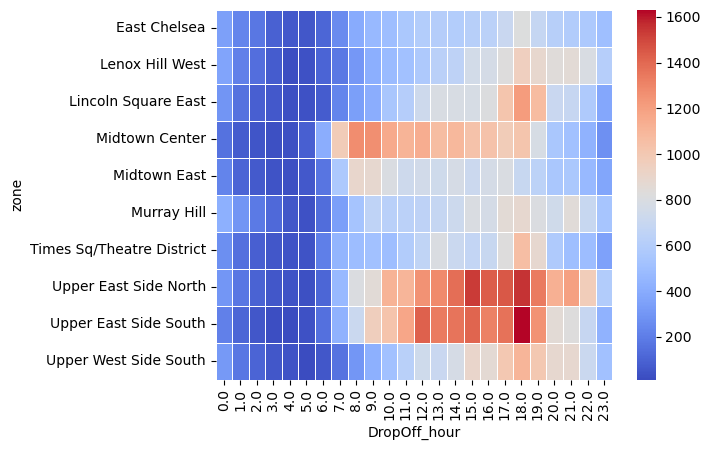

In [721]:
heatmap_data = merged_zones4.pivot_table(index='zone',columns='DropOff_hour',values='dropoff_count')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [723]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
merged_zones5 = pd.merge(merged_zones1,grouped_df4,left_on='LocationID',right_on='DOLocationID',how='left')
merged_zones5.drop('DOLocationID',axis=1,inplace=True)

In [724]:
location_pickups_dropoffs = merged_zones5.groupby('zone').sum(numeric_only=True)[['pickup_count','dropoff_count']]

In [725]:
location_pickups_dropoffs['ratio'] = location_pickups_dropoffs['pickup_count']/location_pickups_dropoffs['dropoff_count']

In [726]:
location_pickups_dropoffs.sort_values('ratio',ascending=False)[:10]

pickup_count  dropoff_count      ratio
zone                                                                
East Elmhurst                      40320.0         2806.0  14.369209
JFK Airport                       458544.0        96840.0   4.735068
LaGuardia Airport                 370896.0       126696.0   2.927448
Penn Station/Madison Sq West      347688.0       217344.0   1.599713
South Jamaica                        588.0          414.0   1.420290
Central Park                      175920.0       125232.0   1.404753
Greenwich Village South           139464.0       103440.0   1.348260
West Village                      247248.0       183504.0   1.347371
Midtown East                      380688.0       297600.0   1.279194
Midtown Center                    485040.0       396528.0   1.223218

In [727]:
location_pickups_dropoffs.sort_values('ratio',ascending=True)[:10]

pickup_count  dropoff_count  ratio
zone                                                       
Allerton/Pelham Gardens           0.0           12.0    0.0
Fresh Meadows                     0.0           49.0    0.0
Crotona Park East                 0.0            9.0    0.0
Country Club                      0.0            6.0    0.0
Port Richmond                     0.0            1.0    0.0
Coney Island                      0.0           29.0    0.0
Westerleigh                       0.0            3.0    0.0
Cypress Hills                     0.0           37.0    0.0
New Dorp/Midland Beach            0.0            2.0    0.0
Murray Hill-Queens                0.0           41.0    0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [729]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
temp = merged_zones5[(merged_zones5['PickUp_hour']<5)|(merged_zones5['PickUp_hour']>=23)]
# Note that the top zones should be of night hours and not the overall top zones

In [730]:
temp.groupby(['LocationID','zone']).sum(numeric_only=True)[['pickup_count']].sort_values('pickup_count',ascending=False)[:10]

pickup_count
LocationID zone                                      
79         East Village                       91512.0
249        West Village                       76128.0
132        JFK Airport                        64272.0
148        Lower East Side                    58176.0
48         Clinton East                       53544.0
114        Greenwich Village South            49872.0
230        Times Sq/Theatre District          42096.0
138        LaGuardia Airport                  34440.0
186        Penn Station/Madison Sq West       34296.0
164        Midtown South                      33936.0

In [731]:
temp.groupby(['LocationID','zone']).sum(numeric_only=True)[['dropoff_count']].sort_values('dropoff_count',ascending=False)[:10]

dropoff_count
LocationID zone                                    
236        Upper East Side North           121638.0
237        Upper East Side South           112794.0
161        Midtown Center                   99132.0
170        Murray Hill                      78156.0
239        Upper West Side South            77130.0
142        Lincoln Square East              74562.0
162        Midtown East                     74400.0
141        Lenox Hill West                  71820.0
230        Times Sq/Theatre District        69678.0
68         East Chelsea                     64638.0

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [902]:
# Filter for night hours (11 PM to 5 AM)
night_df = df1[(df1['PickUp_hour']<5)|(df1['PickUp_hour']>=23)]
night_df['total_amount'].sum()

1419242.7599999998

In [904]:
day_df = df1[(df1['PickUp_hour']>=5) & (df1['PickUp_hour']<23)]
day_df['total_amount'].sum()

11099943.27

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [906]:
# Analyse the fare per mile per passenger for different passenger counts
temp = df1.groupby('passenger_count').sum(numeric_only=True)[['trip_distance','total_amount']].reset_index()
temp['amount_per_mile_per_passenger'] = temp['total_amount']/(temp['trip_distance']*temp['passenger_count'])
temp[['passenger_count','amount_per_mile_per_passenger']]

passenger_count  amount_per_mile_per_passenger
0              1.0                       8.804139
1              2.0                       4.051274
2              3.0                       2.790786
3              4.0                       2.079377
4              5.0                       1.745153
5              6.0                       1.434642

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<Axes: xlabel='PickUp_hour', ylabel='weekday'>

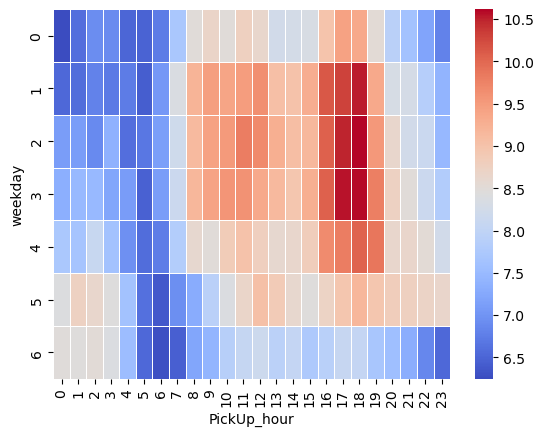

In [738]:
# Compare the average fare per mile for different days and for different times of the day
temp = df1.groupby(['weekday','PickUp_hour']).sum(numeric_only=True)[['trip_distance','total_amount']]
temp['amount_per_mile'] = temp['total_amount']/temp['trip_distance']
heatmap_data = temp.pivot_table(index='weekday',columns='PickUp_hour',values='amount_per_mile')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<Axes: xlabel='PickUp_hour', ylabel='VendorID'>

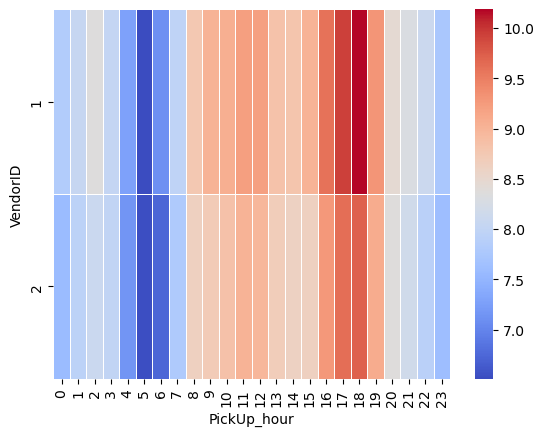

In [740]:
# Compare fare per mile for different vendors
temp = df1.groupby(['VendorID','PickUp_hour']).sum(numeric_only=True)[['trip_distance','total_amount']]
temp['amount_per_mile'] = temp['total_amount']/temp['trip_distance']
heatmap_data = temp.pivot_table(index='VendorID',columns='PickUp_hour',values='amount_per_mile')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<Axes: xlabel='PickUp_hour', ylabel='VendorID'>

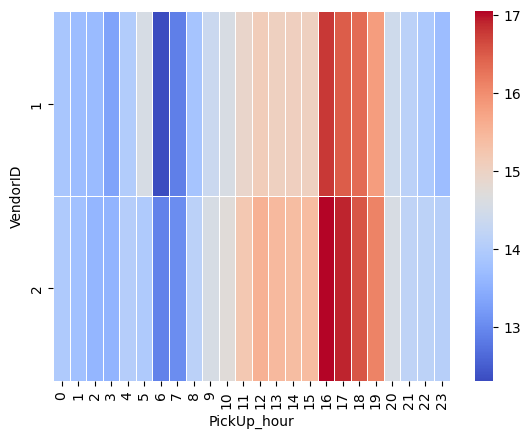

In [742]:
# Defining distance tiers
temp = df1[df1['trip_distance']<=2].groupby(['VendorID','PickUp_hour']).sum(numeric_only=True)[['trip_distance','total_amount']]
temp['amount_per_mile'] = temp['total_amount']/temp['trip_distance']
heatmap_data = temp.pivot_table(index='VendorID',columns='PickUp_hour',values='amount_per_mile')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

<Axes: xlabel='PickUp_hour', ylabel='VendorID'>

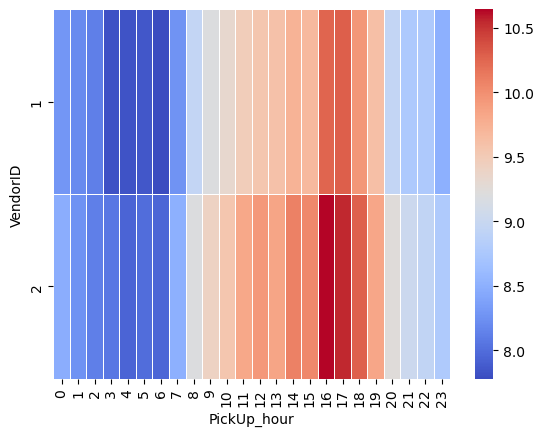

In [743]:
temp = df1[(df1['trip_distance']>2)&(df1['trip_distance']<=5)].groupby(['VendorID','PickUp_hour']).sum(numeric_only=True)[['trip_distance','total_amount']]
temp['amount_per_mile'] = temp['total_amount']/temp['trip_distance']
heatmap_data = temp.pivot_table(index='VendorID',columns='PickUp_hour',values='amount_per_mile')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

<Axes: xlabel='PickUp_hour', ylabel='VendorID'>

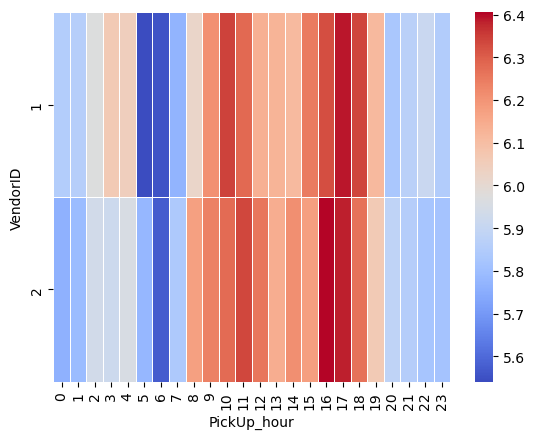

In [744]:
temp = df1[(df1['trip_distance']>5)].groupby(['VendorID','PickUp_hour']).sum(numeric_only=True)[['trip_distance','total_amount']]
temp['amount_per_mile'] = temp['total_amount']/temp['trip_distance']
heatmap_data = temp.pivot_table(index='VendorID',columns='PickUp_hour',values='amount_per_mile')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [747]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df1['tip_percent'] = (df1['tip_amount']*100)/df1['total_amount']

<Axes: xlabel='trip_distance', ylabel='tip_percent'>

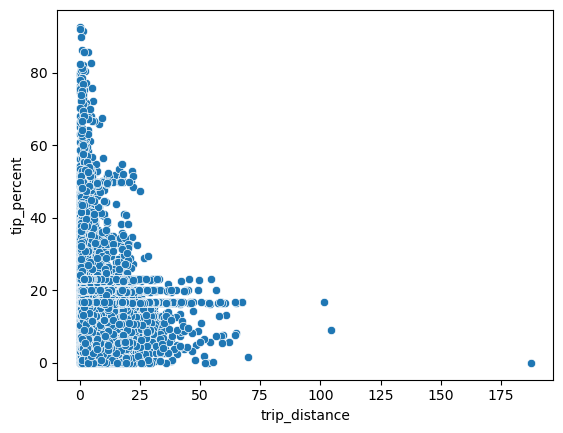

In [748]:
sns.scatterplot(data=df1,x='trip_distance',y='tip_percent')

<Axes: xlabel='passenger_count', ylabel='tip_percent'>

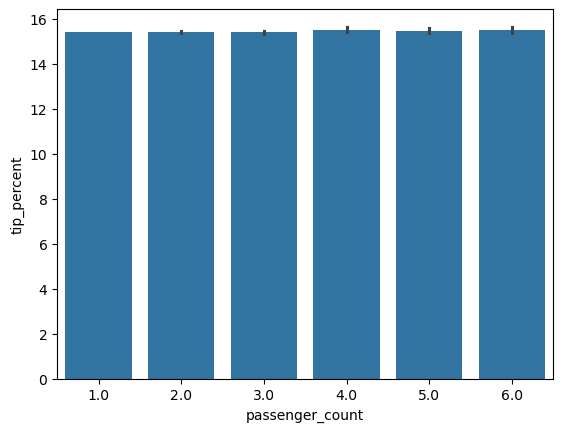

In [749]:
sns.barplot(data=df1,x='passenger_count',y='tip_percent')

<Axes: xlabel='PickUp_hour', ylabel='tip_percent'>

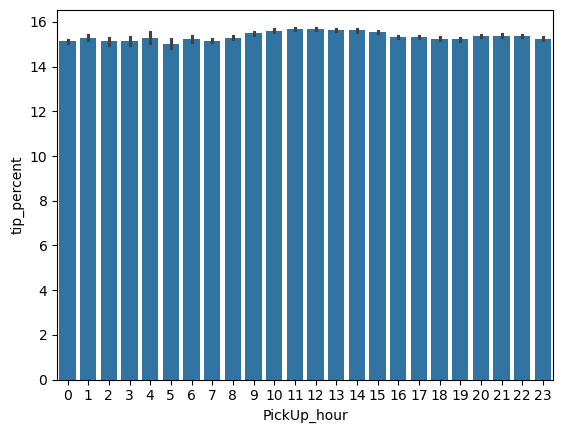

In [750]:
sns.barplot(data=df1,x='PickUp_hour',y='tip_percent')

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [752]:
df1['avg_speed'] = df1['trip_distance']/df1['trip_duration']

<Axes: xlabel='avg_speed', ylabel='tip_percent'>

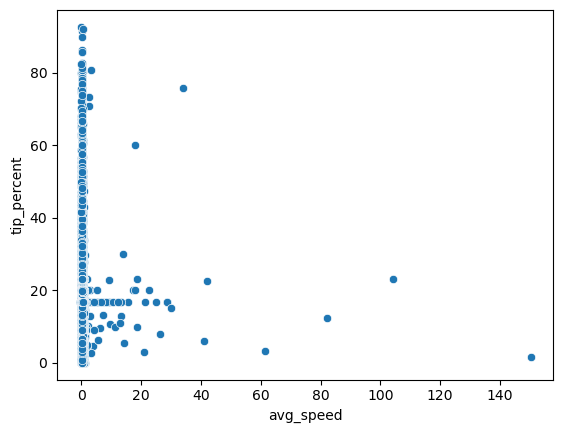

In [753]:
sns.scatterplot(data=df1,x='avg_speed',y='tip_percent')

In [754]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
tip10 = df1[df1['tip_percent']<10]
tip25 = df1[df1['tip_percent']>25]

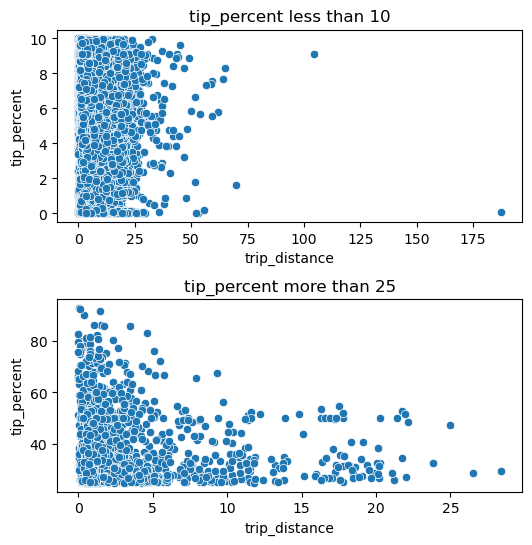

In [755]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

sns.scatterplot(data=tip10,x='trip_distance',y='tip_percent',ax=axes[0])
axes[0].set_title('tip_percent less than 10')

sns.scatterplot(data=tip25,x='trip_distance',y='tip_percent',ax=axes[1])
axes[1].set_title('tip_percent more than 25')

fig.subplots_adjust(hspace=0.4)

plt.show()

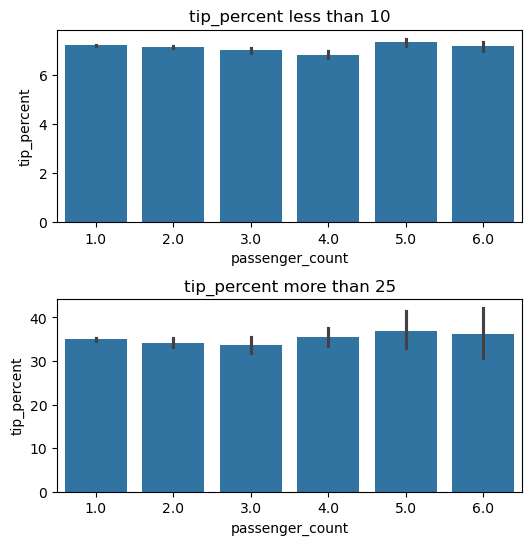

In [756]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

sns.barplot(data=tip10,x='passenger_count',y='tip_percent',ax=axes[0])
axes[0].set_title('tip_percent less than 10')

sns.barplot(data=tip25,x='passenger_count',y='tip_percent',ax=axes[1])
axes[1].set_title('tip_percent more than 25')

fig.subplots_adjust(hspace=0.4)

plt.show()

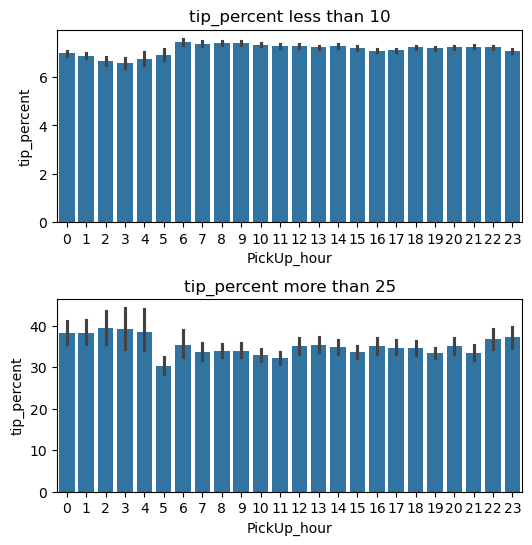

In [757]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))

sns.barplot(data=tip10,x='PickUp_hour',y='tip_percent',ax=axes[0])
axes[0].set_title('tip_percent less than 10')

sns.barplot(data=tip25,x='PickUp_hour',y='tip_percent',ax=axes[1])
axes[1].set_title('tip_percent more than 25')

fig.subplots_adjust(hspace=0.4)

plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<Axes: xlabel='PickUp_hour', ylabel='passenger_count'>

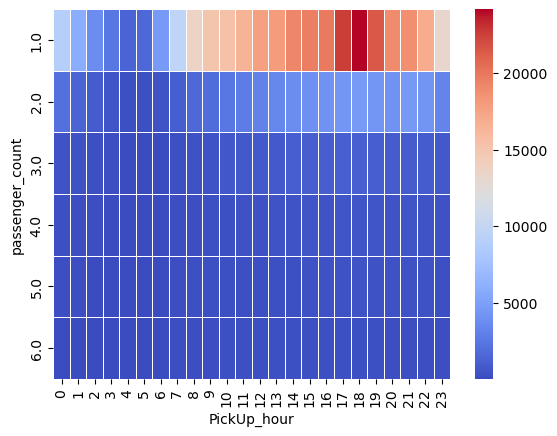

In [759]:
# See how passenger count varies across hours and days

temp = df1.groupby(['passenger_count','PickUp_hour']).size().reset_index(name='trips_per_passenger_count')
heatmap_data = temp.pivot_table(index='passenger_count',columns='PickUp_hour',values='trips_per_passenger_count')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

<Axes: xlabel='weekday', ylabel='passenger_count'>

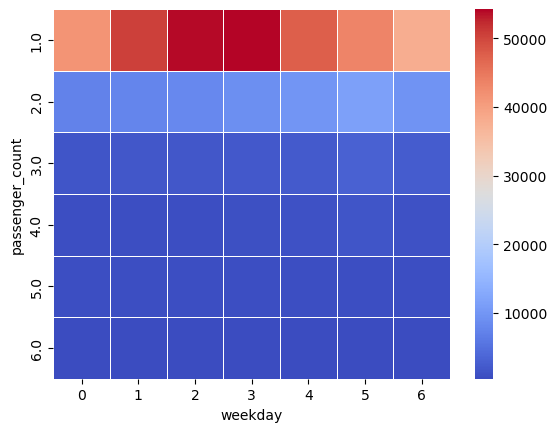

In [760]:
temp = df1.groupby(['passenger_count','weekday']).size().reset_index(name='trips_per_passenger_count')
heatmap_data = temp.pivot_table(index='passenger_count',columns='weekday',values='trips_per_passenger_count')
sns.heatmap(heatmap_data,cmap="coolwarm", linewidths=0.5)

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [762]:
# How does passenger count vary across zones
merged = pd.merge(df1,zones,left_on='PULocationID',right_on='LocationID',how='left')
merged.groupby(['zone']).sum(numeric_only=True)['passenger_count'].reset_index().sort_values('passenger_count',ascending=False)

zone  passenger_count
78                        JFK Airport          28320.0
164             Upper East Side South          27928.0
105                    Midtown Center          27505.0
163             Upper East Side North          25815.0
106                      Midtown East          20887.0
..                                ...              ...
138                      Saint Albans              1.0
146         Springfield Gardens North              1.0
21                           Canarsie              1.0
139  Saint Michaels Cemetery/Woodside              1.0
109                           Midwood              1.0

[183 rows x 2 columns]

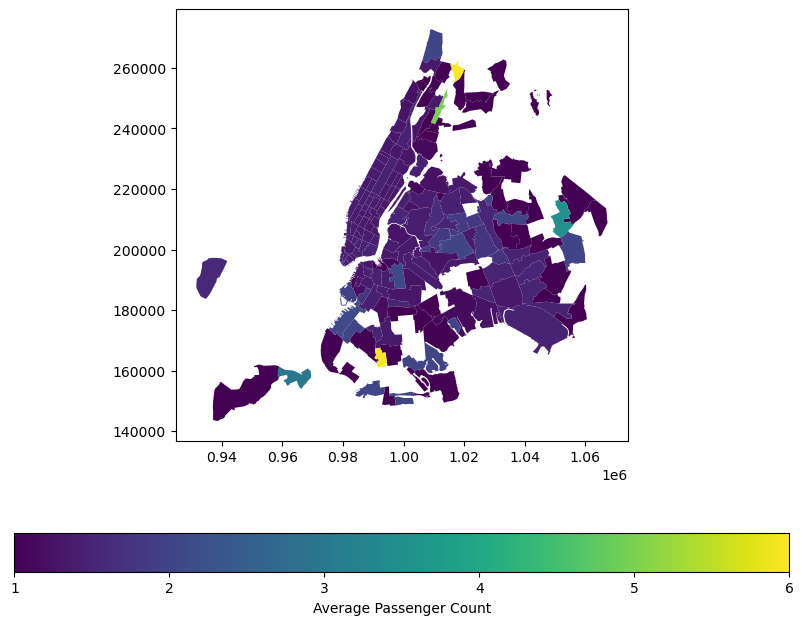

In [763]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
location_total_passenger_count = df1.groupby('PULocationID')['passenger_count'].sum().reset_index()
location_total_trips_count = df1.groupby('PULocationID').size().reset_index(name='trips_count')
temp = pd.merge(zones,location_total_passenger_count,left_on='LocationID',right_on='PULocationID',how='left')
temp.drop('PULocationID',axis=1,inplace=True)
temp = pd.merge(temp,location_total_trips_count,left_on='LocationID',right_on='PULocationID',how='left')
temp.drop('PULocationID',axis=1,inplace=True)
# Create a new column for the average passenger count in each zone.
temp['avg_passenger_count'] = temp['passenger_count']/temp['trips_count']

fig, ax = plt.subplots(figsize=(10, 8))
temp.plot(column='avg_passenger_count',ax=ax,legend=True,legend_kwds = {'label': "Average Passenger Count", 'orientation': "horizontal"})
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

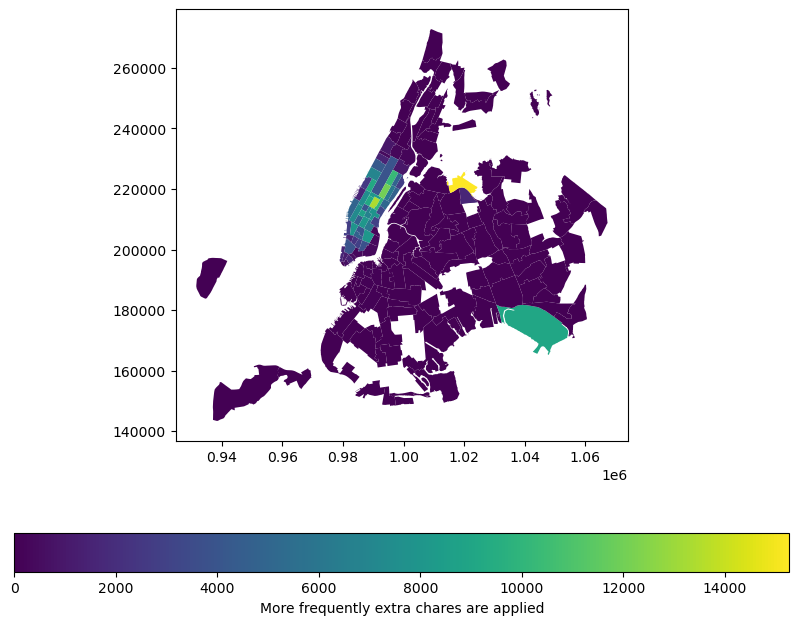

In [766]:
# How often is each surcharge applied?
df1['extra_applied'] = df1['extra'].apply(lambda x: True if x!=0 else False)
temp = df1.groupby('PULocationID')['extra_applied'].sum().reset_index()
zones_extra_applied = pd.merge(zones,temp,left_on='LocationID',right_on='PULocationID',how='left')
zones_extra_applied.drop('PULocationID',axis=1,inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))
zones_extra_applied.plot(column='extra_applied',ax=ax,legend=True,legend_kwds = {'label': "More frequently extra chares are applied", 'orientation': "horizontal"})
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

6pm is the most busiest hour so more taxis should be available at that time
Wednesday and Thursday are the most busiest days so more taxis should be available on these 2 days
May and October are the most busiest months so more taxis should be available on these 2 months
In rainy season taxis should be sent to servicing for better performance
too much supply of taxis will also reduce the revenue generation, so supply should be optimum

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In all the top zones where there are more number of pickups taxi supply should be adequate
where ever there are more pickups in those zones we can increase fare amounts for better revenue generation

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

for trip_distance < 5 we can increase the fare_amounts in the day time during 10am - 2pm for better revenue generation.